In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

# 1) Delivery_time -> Predict delivery time using sorting time 

In [2]:
dataset=pd.read_csv(r"C:\Users\Mandar\Downloads\delivery_time.csv")
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [3]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
dataset.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [5]:
dataset.duplicated().sum()

0

no duplicated values in the dataset

In [6]:
dataset.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

there are no null values in the dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


<Axes: xlabel='Delivery Time', ylabel='Density'>

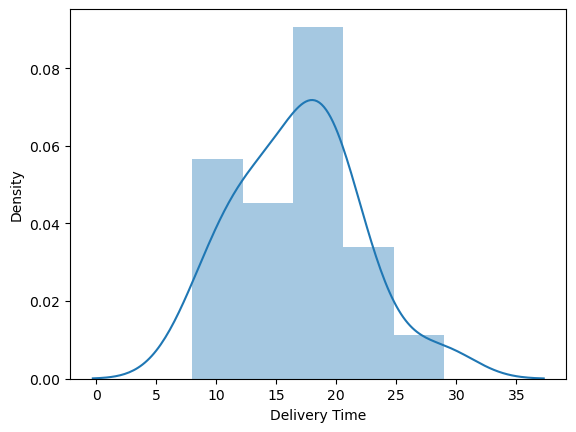

In [8]:
sns.distplot(dataset['Delivery Time'])

here the central peak indicate the unimodial distribution,we can Identify Central tendancy by the location of the peak.

the data is widely spread that indicates higher variablity in delivery times.

<Axes: xlabel='Sorting Time', ylabel='Density'>

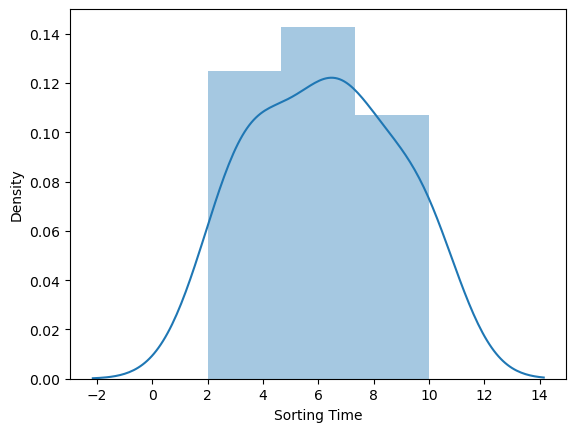

In [9]:
sns.distplot(dataset['Sorting Time'])

here the shape of the distribution is in Bell Shaped.it means normal skewed is occure also multimodal.

In [10]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


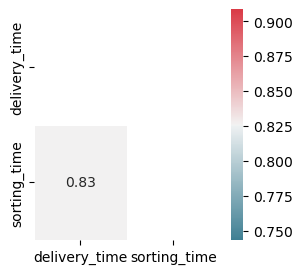

In [11]:
# correlation between data
import matplotlib.pyplot as plt
corr=dataset.corr()
fig, ax = plt.subplots(figsize=(3, 3))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()


Here sorting time is highly positively correlated with delivery time

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

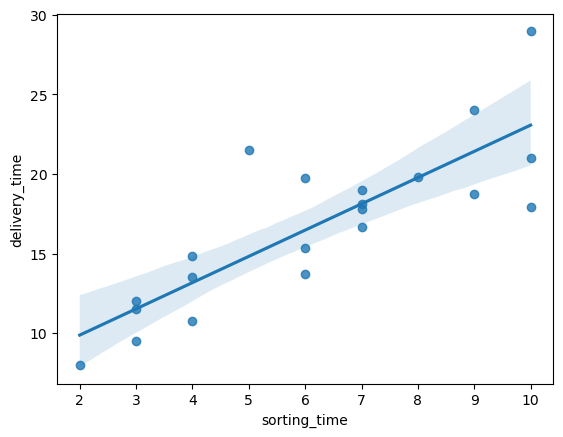

In [12]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

in this regression line has indicates positive slope it indicates poitive correlation.

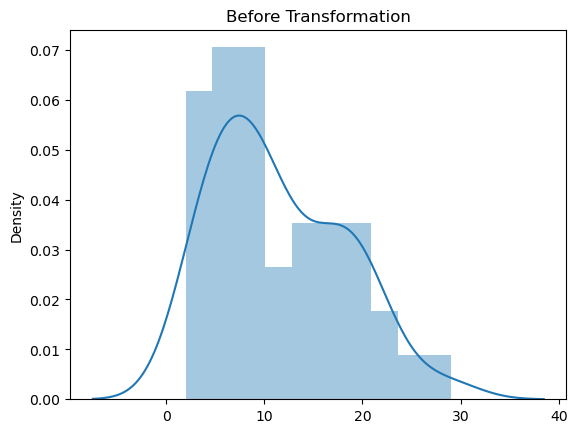

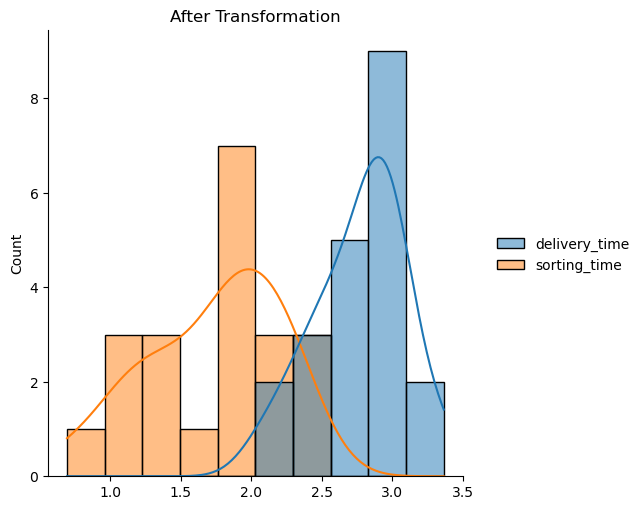

In [13]:
sns.distplot(dataset, bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(dataset), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

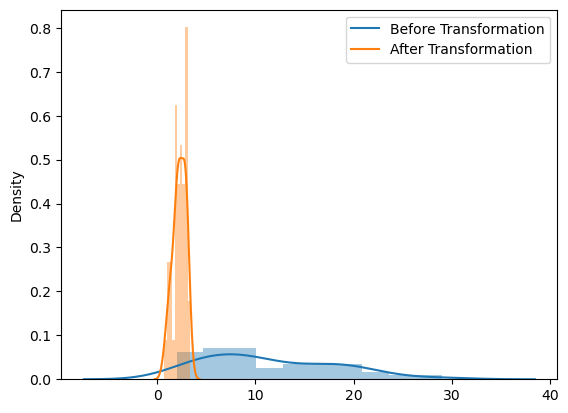

In [14]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset, bins = 10, kde = True)
sns.distplot(np.log(dataset), bins = 10, kde = True)
plt.legend(labels)
plt.show()


# LOG Transforamtion

Text(0.5, 1.0, 'Log-Transformed Data')

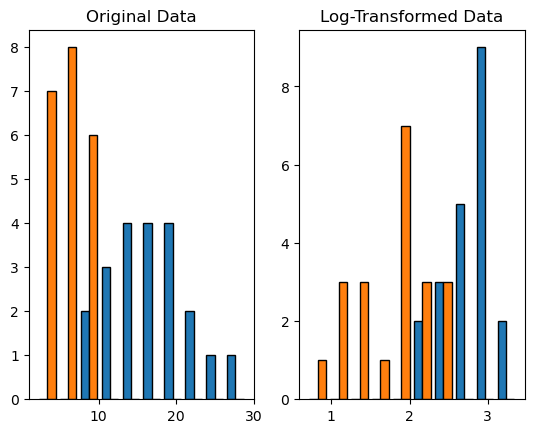

In [15]:
np.random.seed(31)
dataset1 = np.random.beta(a=4, b=5, size=200)
#create log-transformed data
data_log = np.log(dataset)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

# SQRT Transformation

Text(0.5, 1.0, 'Square Root Transformed Data')

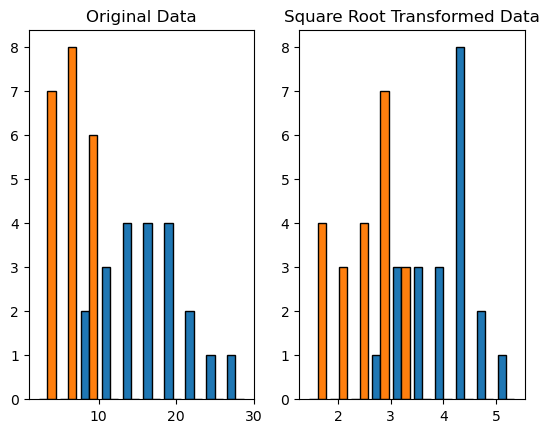

In [16]:
np.random.seed(31)

#create beta distributed random variable with 200 values
data = np.random.beta(a=1, b=5, size=200)

#create sqrt-transformed data
data_sqrt = np.sqrt(dataset)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_sqrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

# CUBEROOT Transformation


Text(0.5, 1.0, 'Cube Root Transformed Data')

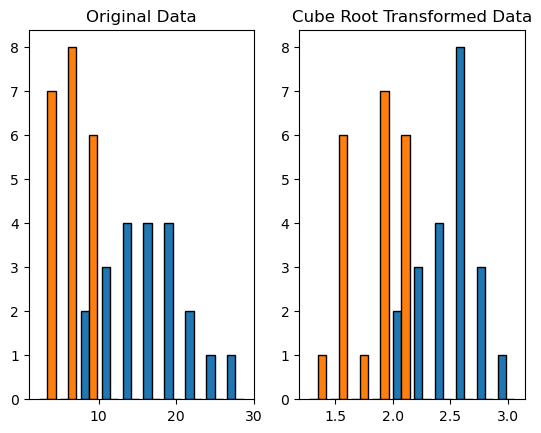

In [17]:
np.random.seed(31)
#create beta distributed random variable with 200 values
Dataset = np.random.beta(a=1, b=5, size=300)

#create cbrt-transformed data
data_cbrt = np.cbrt(dataset)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_cbrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')

# Build a Model

In [18]:
dataset10=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset10

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [19]:
#split the data into train and test dataets
from sklearn.model_selection import train_test_split
X = dataset10.drop(['delivery_time'], axis=1)
y = dataset10['delivery_time']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, shuffle=False)

In [20]:
# Train the model with train dataset
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
parameters = {"copy_X" : np.arange(1,10,2)}
A_model = GridSearchCV(LinearRegression(),param_grid = parameters, scoring='neg_mean_squared_error',cv=2,verbose=12)
A_model.fit(X_train, y_train)
#best hyperparameter
print("Best prameter are :",A_model.best_params_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2; 1/5] START copy_X=1....................................................
[CV 1/2; 1/5] END ...................copy_X=1;, score=-18.619 total time=   0.0s
[CV 2/2; 1/5] START copy_X=1....................................................
[CV 2/2; 1/5] END ...................copy_X=1;, score=-12.271 total time=   0.0s
[CV 1/2; 2/5] START copy_X=3....................................................
[CV 1/2; 2/5] END ...................copy_X=3;, score=-18.619 total time=   0.0s
[CV 2/2; 2/5] START copy_X=3....................................................
[CV 2/2; 2/5] END ...................copy_X=3;, score=-12.271 total time=   0.0s
[CV 1/2; 3/5] START copy_X=5....................................................
[CV 1/2; 3/5] END ...................copy_X=5;, score=-18.619 total time=   0.0s
[CV 2/2; 3/5] START copy_X=5....................................................
[CV 2/2; 3/5] END ...................copy_X=5;, s

In [21]:
linear_modell=LinearRegression(n_jobs =20)
linear_modell.fit(X_train,y_train)

pred = linear_modell.predict( X_test)
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 2.2885987261146505
MSE: 11.20522751242989
RMSE: 3.3474210240765783


In [22]:
# save the model
import pickle
pickle.dump(linear_modell,open('liniear_modell.pkl','wb'))

In [23]:
pickeled_model = pickle.load(open('liniear_modell.pkl','rb'))
print(" predicted delivery time using sorting time 5 is:",pickeled_model.predict([[5]]))

 predicted delivery time using sorting time 5 is: [14.71525188]


In [24]:
pickeled_model = pickle.load(open('liniear_modell.pkl','rb'))
print("predicted delivery time using sorting time 8 is:",pickeled_model.predict([[8]]))

predicted delivery time using sorting time 8 is: [19.66863926]


In [25]:
#split the data into train and test dataets
from sklearn.model_selection import train_test_split
X = dataset10.drop(['delivery_time'], axis=1)
y = dataset10['delivery_time']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, shuffle=False)

In [26]:
# fitts and Test the model
linear_modell=LinearRegression()
linear_modell.fit(X_train,y_train)
linear_modell.score(X_test,y_test)

0.47630450984827166

R-squared of 0.48 means that about 48% of the variability in the target variable is explained by your linear regression model.

# Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression

In [27]:
import statsmodels.formula.api as sm
model = sm.ols('delivery_time~sorting_time', data = dataset10).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        12:20:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

about 68.2% of the variability in delivery_time is explained by sorting_time.
 
Adjusted R-squared (0.666) takes into account the number of predictors in the model and penalizes for unnecessary variables.

The F-statistic (40.80) tests the overall significance of the model. The associated p-value (3.98e-06) is very small, indicating that the model as a whole is statistically significant.

The intercept is 6.5827, which is the estimated delivery_time when sorting_time is zero.
The sorting_time coefficient is 1.6490, meaning that for a one-unit increase in sorting_time, the delivery_time is expected to increase by approximately 1.6490 units.

both the intercept and sorting_time have p-values less than 0.05, suggesting that they are statistically significant predictors.



# Square Root transformation on data

In [29]:
model1 = sm.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = dataset10).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Wed, 20 Dec 2023   Prob (F-statistic):           8.48e-07
Time:                            12:20:50   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cuberoot transformation on Data

In [30]:
model2 = sm.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)', data = dataset10).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Wed, 20 Dec 2023   Prob (F-statistic):           4.90e-07
Time:                            12:20:50   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation on Data

In [31]:
model3 = sm.ols('np.log(delivery_time)~np.log(sorting_time)', data = dataset10).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 20 Dec 2023   Prob (F-statistic):           1.60e-07
Time:                           12:20:50   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing

In [32]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [33]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [34]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Comparing different models with respect to the Root Mean Squared Errors

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
model1_pred_y =np.square(model1.predict(dataset10['sorting_time']))
model2_pred_y =pow(model2.predict(dataset10['sorting_time']),3)
model3_pred_y =np.exp(model3.predict(dataset10['sorting_time']))

In [37]:
model1_rmse =np.sqrt(mean_squared_error(dataset10['delivery_time'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(dataset10['delivery_time'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(dataset10['delivery_time'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3',model3_rmse)

model= 2.934903768890139 
model1= 2.7622942793208676 
model2= 2.7555843098935755 
model3 2.745828897614548


In [38]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model2_rmse, 'model3' : model3_rmse}
rmse

{'model': 2.934903768890139,
 'model1': 2.7622942793208676,
 'model2': 2.7555843098935755,
 'model3': 2.745828897614548}

In [39]:
min(rmse, key=rmse.get)

'model3'

model3 performing better than other mdoels in term of prediction accuracy

In [40]:
predicted2 = pd.DataFrame()
predicted2['sorting_time'] = dataset10.sorting_time
predicted2['delivery_time'] = dataset10.delivery_time
predicted2['Predicted_dilevry_time']=pd.DataFrame(model.predict(predicted2.sorting_time))

In [41]:
predicted2

,sorting_time,delivery_time,Predicted_dilevry_time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


# 2) Salary_hike -> Build a prediction model for 

In [42]:
dataset2=pd.read_csv(r"C:\Users\Mandar\Downloads\Salary_Data.csv")
dataset2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
dataset2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [44]:
dataset2.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [45]:
dataset2.duplicated().sum()

0

There is no duplicated values in the dataset

In [46]:
dataset2.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

There is no null values in the dataset

In [47]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


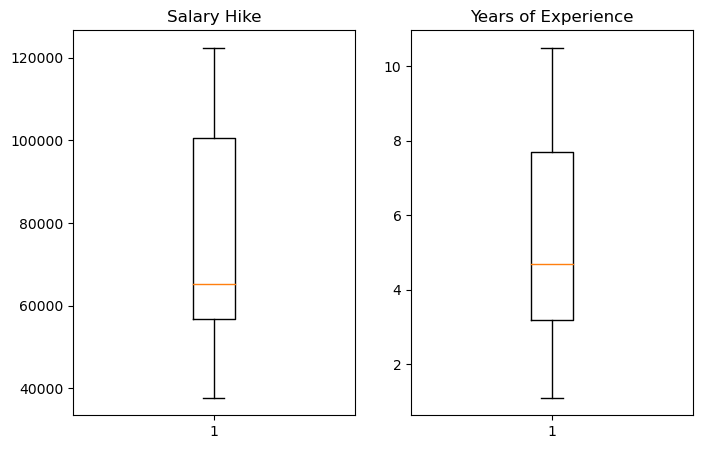

In [48]:
plt.subplots(figsize = (8,5))
plt.subplot(121)
plt.boxplot(dataset2['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(dataset2['YearsExperience'])
plt.title('Years of Experience')
plt.show()

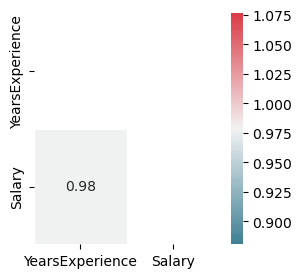

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [50]:
corr=dataset2.corr()
fig, ax = plt.subplots(figsize=(3, 3))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()
dataset2.corr()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

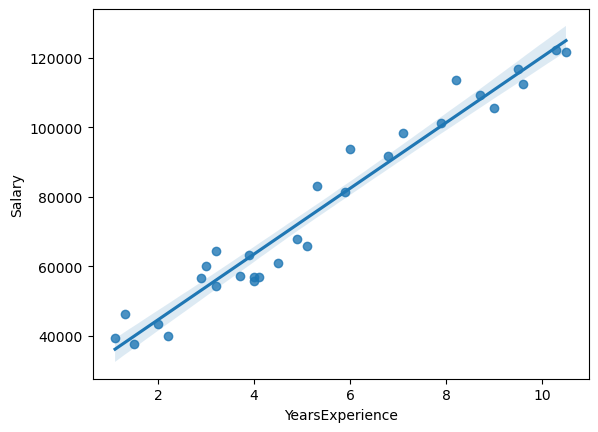

In [51]:
sns.regplot(x=dataset2['YearsExperience'],y=dataset2['Salary'])

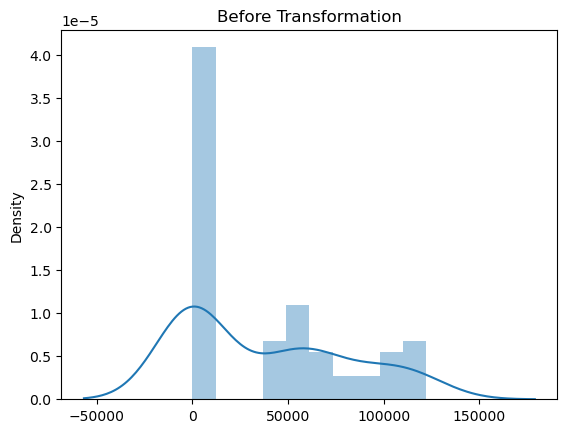

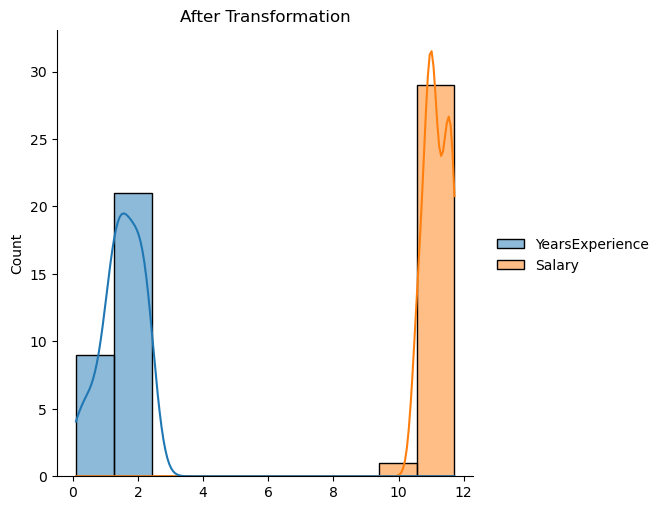

In [52]:
sns.distplot(dataset2, bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(dataset2), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

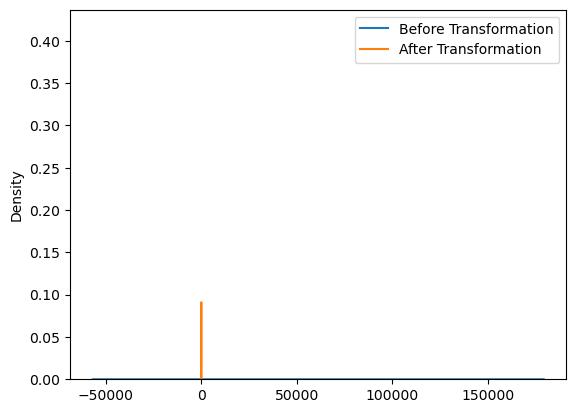

In [53]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset2, bins = 10, kde = True)
sns.distplot(np.log(dataset2), bins = 10, kde = True)
plt.legend(labels)
plt.show()


# LOG Transforamtion

Text(0.5, 1.0, 'Log-Transformed Data')

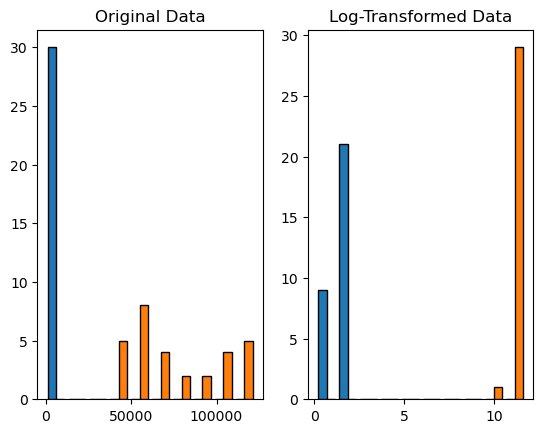

In [54]:
np.random.seed(31)
dataset = np.random.beta(a=4, b=5, size=200)
#create log-transformed data
data_log = np.log(dataset2)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset2, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')


# SQRT Transformation

Text(0.5, 1.0, 'Square Root Transformed Data')

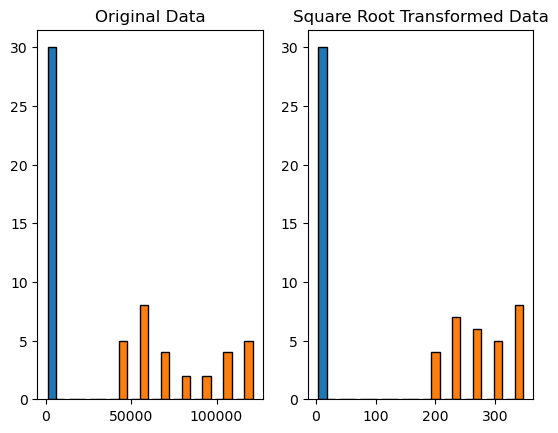

In [55]:
np.random.seed(31)

#create beta distributed random variable with 200 values
data = np.random.beta(a=1, b=5, size=200)

#create sqrt-transformed data
data_sqrt = np.sqrt(dataset2)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset2, edgecolor='black')
axs[1].hist(data_sqrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

# CUBEROOT Transformation

Text(0.5, 1.0, 'Cube Root Transformed Data')

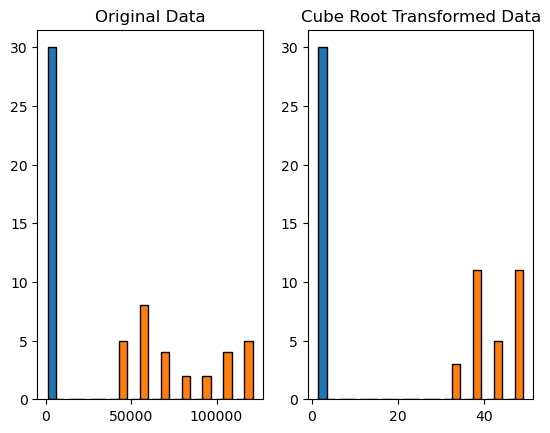

In [56]:
np.random.seed(31)
#create beta distributed random variable with 200 values
dataset = np.random.beta(a=1, b=5, size=300)

#create cbrt-transformed data
data_cbrt = np.cbrt(dataset2)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset2, edgecolor='black')
axs[1].hist(data_cbrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')


# Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
X = dataset2.drop(['Salary'], axis=1)
y = dataset2['Salary']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, shuffle=False)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
parameters = {"copy_X" : np.arange(1,10,2)}
A_model = GridSearchCV(LinearRegression(),param_grid = parameters, scoring='neg_mean_squared_error',cv=2,verbose=12)
A_model.fit(X_train, y_train)
#best hyperparameter
print("Best prameter are :",A_model.best_params_)


Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2; 1/5] START copy_X=1....................................................
[CV 1/2; 1/5] END ............copy_X=1;, score=-174157744.000 total time=   0.0s
[CV 2/2; 1/5] START copy_X=1....................................................
[CV 2/2; 1/5] END .............copy_X=1;, score=-87194662.838 total time=   0.0s
[CV 1/2; 2/5] START copy_X=3....................................................
[CV 1/2; 2/5] END ............copy_X=3;, score=-174157744.000 total time=   0.0s
[CV 2/2; 2/5] START copy_X=3....................................................
[CV 2/2; 2/5] END .............copy_X=3;, score=-87194662.838 total time=   0.0s
[CV 1/2; 3/5] START copy_X=5....................................................
[CV 1/2; 3/5] END ............copy_X=5;, score=-174157744.000 total time=   0.0s
[CV 2/2; 3/5] START copy_X=5....................................................
[CV 2/2; 3/5] END .............copy_X=5;, score=-

In [59]:
linear_modell=LinearRegression(n_jobs =1)
linear_modell.fit(X_train,y_train)

pred = linear_modell.predict( X_test)
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 5353.262547285005
MSE: 35766738.239657864
RMSE: 5980.5299296682615


In [60]:
import pickle
pickle.dump(linear_modell,open('liniear_modell.pkl','wb'))

In [61]:
pickeled_model = pickle.load(open('liniear_modell.pkl','rb'))
print("predicted salary hike for 5.9 yearexperience:",pickeled_model.predict([[5.9]]))

predicted salary hike for 5.9 yearexperience: [82971.28706103]


In [62]:
pickeled_model = pickle.load(open('liniear_modell.pkl','rb'))
print("predicted salary hike for 8.2 yearexperience:",pickeled_model.predict([[8.2]]))

predicted salary hike for 8.2 yearexperience: [106092.69524618]


In [63]:
from sklearn.model_selection import train_test_split

X = dataset2.drop(['Salary'], axis=1)
y = dataset2['Salary']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, shuffle=False)

In [64]:
linear_modell=LinearRegression()
linear_modell.fit(X_train,y_train)
linear_modell.score(X_test,y_test)

0.07028895951396152

# Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression

In [65]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = dataset2).fit()

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        12:20:53   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root transformation on data

In [67]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = dataset2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           7.58e-19
Time:                        12:20:53   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cuberoot transformation on Data

In [68]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = dataset2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           6.37e-18
Time:                        12:20:53   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation on Data

In [69]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = dataset2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           7.40e-16
Time:                        12:20:53   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing

In [70]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [71]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [72]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Comparing different models with respect to the Root Mean Squared Errors

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
model1_pred_y =np.square(model1.predict(dataset2['YearsExperience']))
model2_pred_y =pow(model2.predict(dataset2['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(dataset2['YearsExperience']))

In [75]:
model1_rmse =np.sqrt(mean_squared_error(dataset2['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(dataset2['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(dataset2['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3',model3_rmse)

model= 5788.315051119395 
model1= 5960.64709617431 
model2= 6232.815455835842 
model3 7219.716974372806


In [76]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

In [77]:
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = dataset2.YearsExperience
predicted2['Salary'] = dataset2.Salary
predicted2['Predicted_Salary_Hike']=pd.DataFrame(model.predict(predicted2.YearsExperience))
predicted2

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
